
## Objective

The objective of this project is to build a language model that generates movie overviews using the TMDB API. We will perform exploratory data analysis (EDA) on the movie overviews and fine-tune a language model for text generation.

Group Members:
- Britty Bidari (C0861112)
- Jaspreet Kaur (C0861116)
- Vijay Seelam (C08573219)
- Sushant Giri (C0861112)
"""

In [ ]:
# Step 1: Install required libraries
!pip install fastai
!pip install tmdbv3api

In [ ]:
!pip install wordcloud

In [ ]:
# Step 2: Import necessary modules
import numpy as np
from fastai.text.all import *

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Step 3: Setup your data
from tmdbv3api import TMDb
tmdb = TMDb()
tmdb.api_key = 'db707386d4a7bde24b75391363fb26c6'

In [ ]:
# Fetch movie overviews from TMDB API
from tmdbv3api import Movie
movie = Movie()

movie_list = movie.top_rated()
movie_overviews = [m.overview for m in movie_list]

In [ ]:
# Save movie overviews to a text file
with open('/content/movie_overviews.txt', 'w') as f:
    for overview in movie_overviews:
        f.write(overview + '\n')


In [ ]:
# Step 4: Prepare your data
path = Path('/content')
dls_lm = TextDataLoaders.from_folder(path, is_lm=True, valid_pct=0.1)


Total number of movie overviews: 20
Average length of movie overviews: 45.75 words


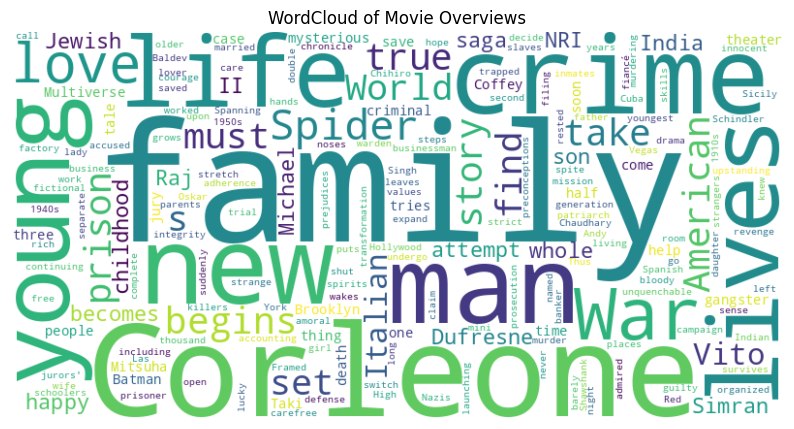

In [ ]:
# Basic EDA
num_movies = len(movie_overviews)
avg_length = np.mean([len(overview.split()) for overview in movie_overviews])

print(f"Total number of movie overviews: {num_movies}")
print(f"Average length of movie overviews: {avg_length:.2f} words")

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(movie_overviews))

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Movie Overviews')
plt.show()

In [ ]:
# Step 5: Fine-tune the language model
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()])
learn.fine_tune(4, 1e-2)


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.797021,None,None,None,00:03


/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.801205,None,None,None,00:03
1,2.743983,None,None,None,00:03
2,2.643203,None,None,None,00:04
3,2.549994,None,None,None,00:03


/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [ ]:
# Step 6: Generate text using the trained model
prompt = "Once upon a time"
generated_text = learn.predict(prompt, n_words=100, temperature=0.7)
print(generated_text)

Xxunk xxunk a xxunk - American 's American American American American Lives , a American American American Life Story , and the American Life of American American Life Lives on the AMERICAN Family Lives Of The Lives of American Life . The story is a story of the young man who , in his family 's life , lives in a family of family , American family , and her family . The American


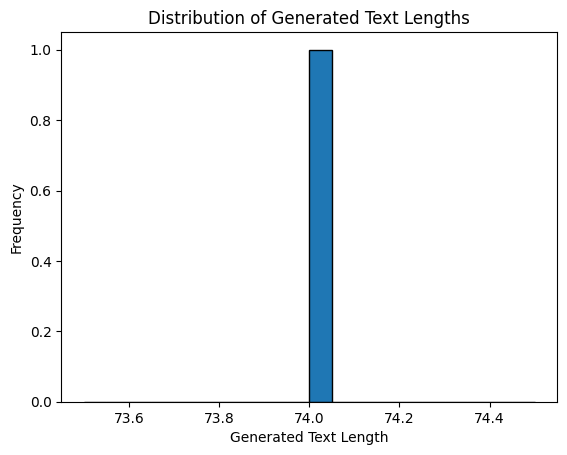

In [ ]:
# Step 7: EDA and Visualization
# Get the lengths of generated text samples
generated_lengths = [len(text.split()) for text in generated_text.split('\n')]

# Plot the distribution of generated text lengths
plt.hist(generated_lengths, bins=20, edgecolor='black')
plt.xlabel('Generated Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Generated Text Lengths')
plt.show()

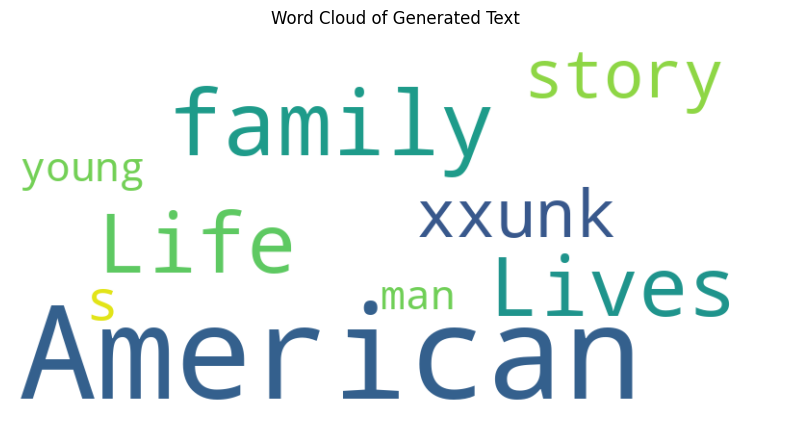

In [ ]:
# Create a word cloud from the generated text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(generated_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Generated Text')
plt.show()

## Conclusion

In this project, we successfully fetched movie overviews from the TMDB API, performed exploratory data analysis (EDA), and built a language model to generate movie overviews. The WordCloud visualization provided insights into the most common words used in the overviews. This project showcases the potential of language models in generating creative text based on existing data.